In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
crime_data = pd.read_csv("Crimes.csv")

In [6]:
crime_data.shape

(161942, 14)

In [7]:
crime_data.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area
0,11798117,JC397040,8/17/19 23:59,058XX W EDDY ST,820,THEFT,$500 AND UNDER,STREET,True,False,1633,16,36.0,15
1,11798223,JC397365,8/17/19 23:59,007XX E 87TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,TAVERN/LIQUOR STORE,False,False,632,6,6.0,44
2,11797883,JC396936,8/17/19 23:57,022XX W 50TH PL,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,False,False,931,9,15.0,63
3,11797909,JC397003,8/17/19 23:55,086XX S PHILLIPS AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,False,False,423,4,7.0,46
4,11797926,JC396947,8/17/19 23:45,079XX S SOUTH CHICAGO AVE,460,BATTERY,SIMPLE,SIDEWALK,True,False,411,4,8.0,46


In [8]:
crime_data.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area            int64
dtype: object

In [9]:
crime_data.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    569
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      7
Community Area            0
dtype: int64

In [11]:
crime_data  = crime_data.dropna()

In [12]:
crime_data.shape

(161366, 14)

In [13]:
crime_data.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
dtype: int64

In [14]:
crime_data = crime_data.drop(['ID', 'Case Number'], axis = 1)

In [15]:
crime_data

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area
0,8/17/19 23:59,058XX W EDDY ST,820,THEFT,$500 AND UNDER,STREET,True,False,1633,16,36.0,15
1,8/17/19 23:59,007XX E 87TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,TAVERN/LIQUOR STORE,False,False,632,6,6.0,44
2,8/17/19 23:57,022XX W 50TH PL,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,False,False,931,9,15.0,63
3,8/17/19 23:55,086XX S PHILLIPS AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,False,False,423,4,7.0,46
4,8/17/19 23:45,079XX S SOUTH CHICAGO AVE,460,BATTERY,SIMPLE,SIDEWALK,True,False,411,4,8.0,46
...,...,...,...,...,...,...,...,...,...,...,...,...
161937,1/1/19 0:00,027XX S TRIPP AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1031,10,22.0,30
161938,1/1/19 0:00,013XX W 72ND PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,734,7,6.0,67
161939,1/1/19 0:00,045XX N BEACON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1913,19,46.0,3
161940,1/1/19 0:00,045XX N GREENVIEW AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,1912,19,47.0,3


In [16]:
crime_data['Date_Time'] = pd.to_datetime(crime_data['Date'])

In [18]:
crime_data.dtypes

Date                            object
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                   int64
Date_Time               datetime64[ns]
dtype: object

In [19]:
crime_data['Year'] = crime_data['Date_Time'].dt.year

In [21]:
crime_data['Month'] = crime_data['Date_Time'].dt.month

In [22]:
crime_data['Day'] = crime_data['Date_Time'].dt.day

In [26]:
crime_data['Hour'] = crime_data['Date_Time'].dt.hour

In [27]:
crime_data['Week_Day'] = crime_data['Date_Time'].dt.weekday

In [28]:
crime_data

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Date_Time,Year,Month,Day,Hour,Week_Day
0,8/17/19 23:59,058XX W EDDY ST,820,THEFT,$500 AND UNDER,STREET,True,False,1633,16,36.0,15,2019-08-17 23:59:00,2019,8,17,23,5
1,8/17/19 23:59,007XX E 87TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,TAVERN/LIQUOR STORE,False,False,632,6,6.0,44,2019-08-17 23:59:00,2019,8,17,23,5
2,8/17/19 23:57,022XX W 50TH PL,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,False,False,931,9,15.0,63,2019-08-17 23:57:00,2019,8,17,23,5
3,8/17/19 23:55,086XX S PHILLIPS AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,False,False,423,4,7.0,46,2019-08-17 23:55:00,2019,8,17,23,5
4,8/17/19 23:45,079XX S SOUTH CHICAGO AVE,460,BATTERY,SIMPLE,SIDEWALK,True,False,411,4,8.0,46,2019-08-17 23:45:00,2019,8,17,23,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161937,1/1/19 0:00,027XX S TRIPP AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1031,10,22.0,30,2019-01-01 00:00:00,2019,1,1,0,1
161938,1/1/19 0:00,013XX W 72ND PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,734,7,6.0,67,2019-01-01 00:00:00,2019,1,1,0,1
161939,1/1/19 0:00,045XX N BEACON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1913,19,46.0,3,2019-01-01 00:00:00,2019,1,1,0,1
161940,1/1/19 0:00,045XX N GREENVIEW AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,1912,19,47.0,3,2019-01-01 00:00:00,2019,1,1,0,1


In [31]:
crime_data['City_Block'] = crime_data['Block'].apply(lambda x:x.split()[0])

In [32]:
crime_data

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Date_Time,Year,Month,Day,Hour,Week_Day,City_Block
0,8/17/19 23:59,058XX W EDDY ST,820,THEFT,$500 AND UNDER,STREET,True,False,1633,16,36.0,15,2019-08-17 23:59:00,2019,8,17,23,5,058XX
1,8/17/19 23:59,007XX E 87TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,TAVERN/LIQUOR STORE,False,False,632,6,6.0,44,2019-08-17 23:59:00,2019,8,17,23,5,007XX
2,8/17/19 23:57,022XX W 50TH PL,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,False,False,931,9,15.0,63,2019-08-17 23:57:00,2019,8,17,23,5,022XX
3,8/17/19 23:55,086XX S PHILLIPS AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,False,False,423,4,7.0,46,2019-08-17 23:55:00,2019,8,17,23,5,086XX
4,8/17/19 23:45,079XX S SOUTH CHICAGO AVE,460,BATTERY,SIMPLE,SIDEWALK,True,False,411,4,8.0,46,2019-08-17 23:45:00,2019,8,17,23,5,079XX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161937,1/1/19 0:00,027XX S TRIPP AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1031,10,22.0,30,2019-01-01 00:00:00,2019,1,1,0,1,027XX
161938,1/1/19 0:00,013XX W 72ND PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,734,7,6.0,67,2019-01-01 00:00:00,2019,1,1,0,1,013XX
161939,1/1/19 0:00,045XX N BEACON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1913,19,46.0,3,2019-01-01 00:00:00,2019,1,1,0,1,045XX
161940,1/1/19 0:00,045XX N GREENVIEW AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,1912,19,47.0,3,2019-01-01 00:00:00,2019,1,1,0,1,045XX


<AxesSubplot:>

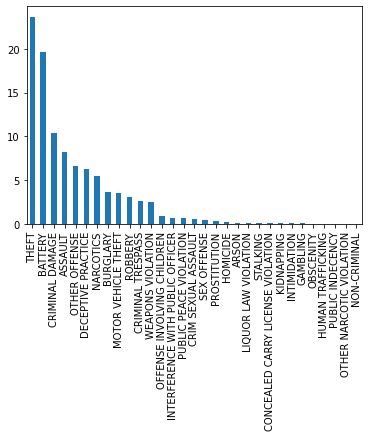

In [43]:
((crime_data['Primary Type'].value_counts()/len(crime_data))*100).plot.bar()

In [46]:
((crime_data['Location Description'].value_counts()/len(crime_data))*100)

STREET                      22.232069
RESIDENCE                   16.314465
APARTMENT                   13.461944
SIDEWALK                     7.829406
OTHER                        3.997744
                              ...    
HOTEL                        0.000620
TRAILER                      0.000620
CHA PARKING LOT              0.000620
BARBER SHOP/BEAUTY SALON     0.000620
CTA "L" PLATFORM             0.000620
Name: Location Description, Length: 122, dtype: float64

<AxesSubplot:>

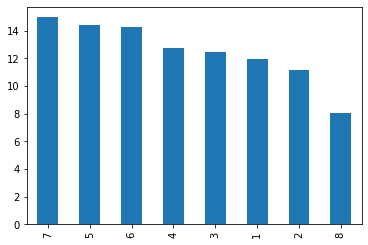

In [48]:
((crime_data['Month'].value_counts()/len(crime_data))*100).plot.bar()

<AxesSubplot:>

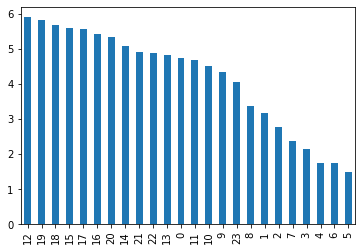

In [49]:
((crime_data['Hour'].value_counts()/len(crime_data))*100).plot.bar()

<AxesSubplot:xlabel='Counts', ylabel='Primary Type'>

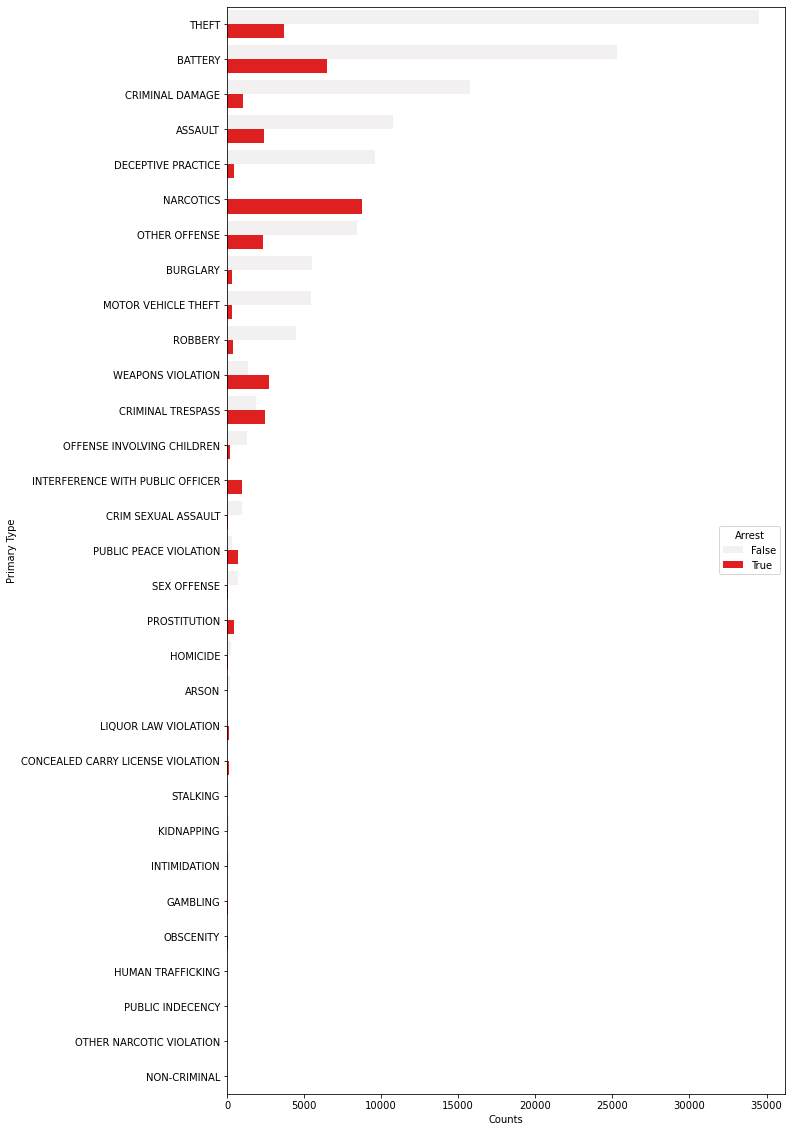

In [58]:
crime_count = pd.DataFrame(crime_data.groupby(['Primary Type', 'Arrest']).size().sort_values(ascending = False).rename('Counts')).reset_index()
plt.figure(figsize = (10,20))
sns.barplot(y = 'Primary Type', x = 'Counts', data = crime_count, hue = 'Arrest', color = 'red')

In [51]:
crime_count

,Primary Type,Arrest,Counts
0,THEFT,False,34480
1,BATTERY,False,25270
2,CRIMINAL DAMAGE,False,15793
3,ASSAULT,False,10797
4,DECEPTIVE PRACTICE,False,9589
5,NARCOTICS,True,8763
6,OTHER OFFENSE,False,8414
7,BATTERY,True,6457
8,BURGLARY,False,5534
9,MOTOR VEHICLE THEFT,False,5419
